# 무비퍼스_영화 흥행도 및 관객 수 예측 분석

## import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 데이터 불러오기

In [2]:
data = pd.read_excel('naver_merge.xlsx')
data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,...,0.65,654386,0,76445,0.0,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']"
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,...,1.03,475309,0,102278,0.0,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']"


## 지수화

### 감독 지수

In [3]:
dir_data = data

In [4]:
dir_data['dir_pre_cnt'] = int(0) # 이전 작품 수
dir_data['dir_pre_aud'] = dir_data['sum_audience'] # 이전 누적 관객수

In [5]:
dir_count = dir_data[['title','director']].groupby('director').count()
dir_count = dir_count.reset_index()
dir_count

,director,title
0,D.J. 카루소,2
1,F. 게리 그레이,3
2,J.J. 에이브럼스,3
3,M. 나이트 샤말란,5
4,M.J. 버세트,1
...,...,...
1035,후안 안토니오 바요나,2
1036,후쿠다 유이치,1
1037,히라야마 미호,1
1038,히라오 타카유키,1


In [6]:
dir_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   director  1040 non-null   object
 1   title     1040 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 16.4+ KB


In [7]:
dir_pre_data = dir_data.sort_values(by=['director','title', 'opening_date'])
dir_pre_data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,...,0.65,654386,0,76445,0.0,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']"
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,...,1.03,475309,0,102278,0.0,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']"


In [8]:
dir_pre_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            1474 non-null   object        
 1   opening_date     1474 non-null   datetime64[ns]
 2   sum_sales        1474 non-null   int64         
 3   sum_audience     1474 non-null   int64         
 4   screens          1474 non-null   int64         
 5   shows            1474 non-null   int64         
 6   main_nation      1474 non-null   object        
 7   producer         668 non-null    object        
 8   distributor      1474 non-null   object        
 9   rated            1474 non-null   object        
 10  genre            1474 non-null   object        
 11  director         1474 non-null   object        
 12  actor            1474 non-null   object        
 13  year             1474 non-null   int64         
 14  dir_pre_cnt      1474 non-null   int64  

In [9]:
dir_count.loc[0,['director']]

director    D.J. 카루소
Name: 0, dtype: object

In [10]:
tmp_data = dir_data[dir_data['director']=='D.J. 카루소'].sort_values(by=['opening_date'])
idx_list = list(tmp_data.index)
idx_list

[0, 1]

In [11]:
tmp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   title            2 non-null      object        
 1   opening_date     2 non-null      datetime64[ns]
 2   sum_sales        2 non-null      int64         
 3   sum_audience     2 non-null      int64         
 4   screens          2 non-null      int64         
 5   shows            2 non-null      int64         
 6   main_nation      2 non-null      object        
 7   producer         0 non-null      object        
 8   distributor      2 non-null      object        
 9   rated            2 non-null      object        
 10  genre            2 non-null      object        
 11  director         2 non-null      object        
 12  actor            2 non-null      object        
 13  year             2 non-null      int64         
 14  dir_pre_cnt      2 non-null      int64        

In [12]:
def dir_pre_add(dir_count, dir_pre_data):
    for i in range(0, len(dir_count)):
        name     = dir_count.loc[i,'director']
        count    = dir_count.loc[i,'title']   # title 이지만 count 값을 나타냄
        tmp_data = dir_pre_data[dir_pre_data['director']==name].sort_values(by=['opening_date'])
        #print(f'name: {name}, count: {count}')
        k = 0
        if (count == len(tmp_data)):
            for j in range(0, len(tmp_data)):
                # if j == 0:
                #     print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
                # else :
                if j > 0 :
                    tmp_data.iloc[j,14] = j
                    tmp_data.iloc[j,15] = tmp_data.iloc[j]['dir_pre_aud'] + tmp_data.iloc[j-1]['dir_pre_aud']
                    #print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
        idx_list = list(tmp_data.index)
        #print(idx_list)
        for i, idx in enumerate(idx_list):
            # print(i, idx, dir_pre_data.loc[idx,'dir_pre_cnt'], tmp_data.iloc[i]['dir_pre_cnt'],
            #       dir_pre_data.loc[idx,'dir_pre_aud'], tmp_data.iloc[i]['dir_pre_aud'])
            dir_pre_data.loc[idx,'dir_pre_cnt'] = tmp_data.iloc[i]['dir_pre_cnt']
            dir_pre_data.loc[idx,'dir_pre_aud'] = tmp_data.iloc[i]['dir_pre_aud']

In [13]:
# 감독 지수 만들기
dir_pre_add(dir_count, dir_pre_data)

In [14]:
# min - max 사이 percent 점수 구하기
def func_dir_scored(audience):
    cat = 0
    if audience < 1000000: cat = np.round(audience / 10**6,2)
    elif audience < 5000000 : cat = 1 + np.round((audience-10**6) / (5*(10**6)-10**6),2)
    elif audience < 7000000 : cat = 2 + np.round((audience-(5*10**6)) / (7*(10**6)-(5*10**6)),2)
    elif audience < 10000000 : cat = 3 + np.round((audience-(7*10**6)) / (10**7-(7*10**6)),2)
    else : cat = 4 + np.round((audience - 10**7) / (15*(10**7)-(10**7)),2)
    return cat

In [15]:
# test
func_dir_scored(12*10**6 + 1000000)

4.02

In [16]:
dir_pre_data['dir_score'] = int(0)

In [17]:
dir_pre_data['dir_score']=  dir_pre_data['dir_pre_aud'].apply(func_dir_scored)

In [18]:
# 감독 지수 테스트 하기
# dir_pre_data.dir_score.value_counts()

In [19]:
# dir_pre_data.dir_pre_cnt.value_counts()

In [20]:
dir_pre_data[dir_pre_data['director']=='F. 게리 그레이']

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
2,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,12세이상관람가,...,1.89,851917,0,97631,6.46,4.86,5.06,"['액션/코미디/SF', '512', '12세 관람가', '2019.06.12', ...","{'연출': '25%', '연기': '31%', '스토리': '25%', '영상미'...","['크리스 헴스워스', '테사 톰슨']"
3,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),15세이상관람가,...,1.68,3653238,0,140731,9.18,6.00,8.96,"['액션/범죄/스릴러', '6161', '15세 관람가', '2020.03.19',...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '드웨인 존슨', '샤를리즈 테론', '제이슨 스타뎀']"
4,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),청소년관람불가,...,0.05,48844,0,130957,8.96,7.08,8.84,"['드라마', '311', '', '2015.09.10', 'F. 게리 그레이', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['오셔 잭슨 주니어', '코리 호킨스', '제이슨 밋첼']"


### 상관계수

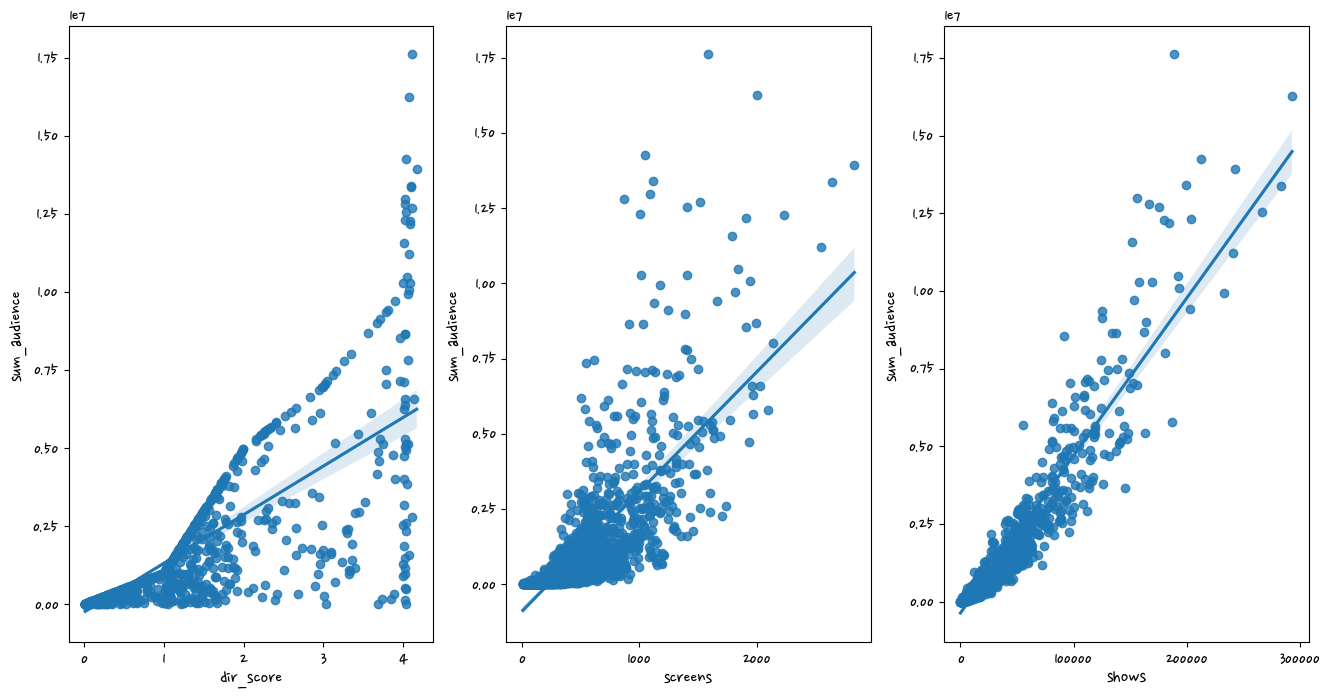

In [21]:
lm_features = ['dir_score', 'screens', 'shows']
fig, axs = plt.subplots(figsize=(16,8) , ncols=3 , nrows=1)
for i , feature in enumerate(lm_features):
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='sum_audience',data=dir_pre_data , ax=axs[i])

### 배우 지수

In [22]:
act_pre_data = dir_pre_data

In [23]:
act_pre_data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,...,0.65,654386,0,76445,0.0,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']"
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,...,1.03,475309,0,102278,0.0,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']"


In [24]:
act_pre_data['act_pre_aud'] = act_pre_data['sum_audience'] # 이전 누적 관객수
act_pre_data['act_score'] = float(0.)

In [25]:
# 수정중
# for idx, row in act_pre_data.iterrows() :
#     try :
#         act1 = row.actor.split(',')[0]
#         act2 = row.actor.split(',')[1]
#     except:
#         act1 = row.actor.split(',')[0]
#         act1 = 'NaN'
        
#     print(act1,'/', act_pre_data[act_pre_data['actor'].str.contains(act1)].index)
#     print(act2, '/', act_pre_data[act_pre_data['actor'].str.contains(act2)].index)


In [26]:
# act_grp_count['act01','act02'].get_group('제임스 코든').count()

# act_count2 = pd.DataFrame(act_pre_data.groupby('act02')['act02'].count().reset_index(name='count'))
# act_count2



# tmp_data = dir_data[dir_data['director']=='D.J. 카루소'].sort_values(by=['opening_date'])
# idx_list = list(tmp_data.index)
# idx_list

# # 수정중
# def dir_pre_add(dir_count, dir_pre_data): 
#     for i in range(0, 2):
#         name     = dir_count.loc[i,'director']  
#         count    = dir_count.loc[i,'title']   # title 이지만 count 값을 나타냄
#         tmp_data = dir_pre_data[dir_pre_data['director']==name].sort_values(by=['opening_date'])
#         #print(f'name: {name}, count: {count}')
#         k = 0
#         if (count == len(tmp_data)):
#             for j in range(0, len(tmp_data)):
#                 if j == 0:
#                     print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
#                 else :
#                     print(f'bef k:{k}')
#                     tmp_data.iloc[j,14] = j 
#                     tmp_data.iloc[j,15] = tmp_data.iloc[j]['dir_pre_aud'] + tmp_data.iloc[j-1]['dir_pre_aud']
#                     print(f"name:{name}, idx: {j}, dir_pre_cnt:{tmp_data.iloc[j]['dir_pre_cnt']}, dir_pre_aud:{tmp_data.iloc[j]['dir_pre_aud']}")
                
#         idx_list = list(tmp_data.index)
#         print(idx_list)
#         for i, idx in enumerate(idx_list):
#             print(i, idx, dir_pre_data.loc[idx,'dir_pre_cnt'], tmp_data.iloc[i]['dir_pre_cnt'], 
#                   dir_pre_data.loc[idx,'dir_pre_aud'], tmp_data.iloc[i]['dir_pre_aud'])
#             dir_pre_data.loc[idx,'dir_pre_cnt'] = tmp_data.iloc[i]['dir_pre_cnt']
#             dir_pre_data.loc[idx,'dir_pre_aud'] = tmp_data.iloc[i]['dir_pre_aud']

## 네이버 영화정보, 평점, 주연 가져오기

In [27]:
import ast
import urllib.request

In [28]:
# 코드 가져오기
client_id = "zNy0lMSY0raZjZipmO_1"
client_secret = "ZlPl2DL9sf"

encText = urllib.parse.quote("미니언즈")
yearfrom = '2015'
yearto = '2015'

url = "https://openapi.naver.com/v1/search/movie.json?query=" + encText + '&yearfrom=' + yearfrom +  '&yearto=' + yearto # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)

request.add_header("X-Naver-Client-Id", client_id)
request.add_header("X-Naver-Client-Secret", client_secret)

response = urllib.request.urlopen(request)

rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    data = ast.literal_eval(response_body.decode('utf-8'))
    print(data['items'][0]['link'].replace('\\', '').split('=')[1])
    
else:
    print("Error Code:" + rescode)

113351


In [29]:
from get import data
from get import ratings
from get import actor

In [30]:
codes = ['191634', '69105', '52420', '101062', '90834', '89294']
datas = []

for i in codes:
    temp_data = data(i)

    temp_ratings = ratings(i)
    temp_ratings = {'평점': temp_ratings}

    temp_actor = actor(i)
    temp_actor = {'주연': temp_actor}

    temp_data.update(temp_ratings)
    temp_data.update(temp_actor)
    datas.append(temp_data)

print(datas)

[{'title': '미니언즈2', 'ratings': [7.9, 5.67, 7.68], 'info': ['애니메이션/모험/코미디', '2022.07.20', '전체 관람가', '카일 발다', '87'], '평점': {'연출': '21%', '연기': '15%', '스토리': '19%', '영상미': '33%', 'OST': '12%'}, '주연': ['스티브 카렐', '타라지 P. 헨슨', '양자경', '루시 로리스', '장 끌로드 반담']}, {'title': '월-E', 'ratings': [0.0, 7.88, 9.42], 'info': ['애니메이션/SF/가족/코미디/모험', '2008.08.06', '전체 관람가', '앤드류 스탠튼', '104'], '평점': None, '주연': ['벤 버트', '엘리사 나이트', '제프 갈린', '프레드 윌러드']}, {'title': '용서는 없다', 'ratings': [0.0, 4.96, 7.6], 'info': ['범죄/스릴러', '2010.01.07', '청소년 관람불가', '김형준', '125'], '평점': None, '주연': ['설경구', '류승범', '한혜진']}, {'title': '스니치', 'ratings': [0.0, 4.0, 8.41], 'info': ['액션/드라마/스릴러', '2013.05.09', '15세 관람가', '릭 로먼 워', '112'], '평점': None, '주연': ['드웨인 존슨', '수잔 서랜든', '존 번탈', '나딘 벨라즈퀘즈']}, {'title': '잭 리처', 'ratings': [0.0, 6.43, 7.28], 'info': ['액션', '2013.01.17', '15세 관람가', '크리스토퍼 맥쿼리', '130'], '평점': None, '주연': ['톰 크루즈', '로자먼드 파이크', '로버트 듀발']}, {'title': '토르 : 마법망치의 전설', 'ratings': [0.0, 4.0, 5.6], 'info': ['애니메이션/모험', '2012.

## 인코딩

### 관람등급 인코딩

In [31]:
data = dir_pre_data

In [32]:
data.head(2)

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,rated,...,dir_score,act_pre_aud,act_score,nv_code,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,12세이상관람가,...,0.65,654386,0.0,76445,0.0,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']"
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,15세이상관람가,...,1.03,475309,0.0,102278,0.0,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']"


In [33]:
# 관람등급 확인
data.rated.unique()

array(['12세이상관람가', '15세이상관람가', '청소년관람불가', '전체관람가'], dtype=object)

In [34]:
rated_new = pd.get_dummies(data['rated'])

In [35]:
rated_new

,12세이상관람가,15세이상관람가,전체관람가,청소년관람불가
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
1469,1,0,0,0
1470,1,0,0,0
1471,0,0,1,0
1472,0,0,1,0


In [36]:
rated_new.columns = ['rated_12', 'rated_15', 'rated_all', 'rated_19']
rated_new

,rated_12,rated_15,rated_all,rated_19
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
1469,1,0,0,0
1470,1,0,0,0
1471,0,0,1,0
1472,0,0,1,0


In [37]:
data.drop(columns=['rated'],inplace=True)
data = pd.concat([data,rated_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,genre,...,ratings_aud,ratings_critics,ratings_netizen,info,감상포인트,주연,rated_12,rated_15,rated_all,rated_19
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,"액션,SF",...,0.00,5.10,7.34,"['액션/SF/스릴러', '0', '12세 관람가', '2011.02.24', 'D...",NaN,"['알렉스 페티퍼', '티모시 올리펀트', '테레사 팔머']",1,0,0,0
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,"액션,어드벤처,스릴러",...,0.00,8.19,6.94,"['액션/모험/스릴러', '857', '15세 관람가', '2017.02.08', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '사무엘 L. 잭슨', '루비 로즈', '니나 도브레브']",0,1,0,0
2,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,"액션,코미디,SF",...,6.46,4.86,5.06,"['액션/코미디/SF', '512', '12세 관람가', '2019.06.12', ...","{'연출': '25%', '연기': '31%', '스토리': '25%', '영상미'...","['크리스 헴스워스', '테사 톰슨']",1,0,0,0
3,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),"액션,범죄,스릴러",...,9.18,6.00,8.96,"['액션/범죄/스릴러', '6161', '15세 관람가', '2020.03.19',...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['빈 디젤', '드웨인 존슨', '샤를리즈 테론', '제이슨 스타뎀']",0,1,0,0
4,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),드라마,...,8.96,7.08,8.84,"['드라마', '311', '', '2015.09.10', 'F. 게리 그레이', ...","{'연출': '0%', '연기': '0%', '스토리': '0%', '영상미': '...","['오셔 잭슨 주니어', '코리 호킨스', '제이슨 밋첼']",0,0,0,1


### 장르 인코딩

In [38]:
data['genre'] = data.genre.str.split(',').str.get(0)

In [39]:
data.genre.value_counts()

액션          322
드라마         253
애니메이션       227
코미디         134
공포(호러)       84
스릴러          81
범죄           76
멜로/로맨스       75
SF           46
미스터리         40
판타지          32
사극           31
어드벤처         30
가족           17
전쟁            8
다큐멘터리         6
뮤지컬           5
공연            4
기타            2
서부극(웨스턴)      1
Name: genre, dtype: int64

In [40]:
data['genre'].mask(data['genre'] == '공연', '기타', inplace=True)
data['genre'].mask(data['genre'] == '뮤지컬', '기타', inplace=True)
data['genre'].mask(data['genre'] == '서부극(웨스턴)', '기타', inplace=True)
data['genre'].mask(data['genre'] == 'SF', 'SF/판타지', inplace=True)
data['genre'].mask(data['genre'] == '판타지', 'SF/판타지', inplace=True)

In [41]:
# 장르 변경 확인
data.genre.value_counts()

액션        322
드라마       253
애니메이션     227
코미디       134
공포(호러)     84
스릴러        81
SF/판타지     78
범죄         76
멜로/로맨스     75
미스터리       40
사극         31
어드벤처       30
가족         17
기타         12
전쟁          8
다큐멘터리       6
Name: genre, dtype: int64

In [42]:
genre_new = pd.get_dummies(data['genre'])
genre_new

,SF/판타지,가족,공포(호러),기타,다큐멘터리,드라마,멜로/로맨스,미스터리,범죄,사극,스릴러,애니메이션,액션,어드벤처,전쟁,코미디
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1471,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1472,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [43]:
genre_new.columns = ['genre_fantasy',
                     'genre_family',
                     'genre_horror',
                     'genre_etc',
                     'genre_documentary',
                     'genre_drama',
                     'genre_romance',
                     'genre_mystery',
                     'genre_crime',
                     'genre_historical',
                     'genre_thriller',
                     'genre_animation',
                     'genre_action',
                     'genre_adventure',
                     'genre_war',
                     'genre_comedy'
                    ]
genre_new

,genre_fantasy,genre_family,genre_horror,genre_etc,genre_documentary,genre_drama,genre_romance,genre_mystery,genre_crime,genre_historical,genre_thriller,genre_animation,genre_action,genre_adventure,genre_war,genre_comedy
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1471,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1472,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [44]:
data.drop(columns=['genre'],inplace=True)
data = pd.concat([data,genre_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,main_nation,producer,distributor,director,...,genre_romance,genre_mystery,genre_crime,genre_historical,genre_thriller,genre_animation,genre_action,genre_adventure,genre_war,genre_comedy
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,미국,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,D.J. 카루소,...,0,0,0,0,0,0,1,0,0,0
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,미국,NaN,롯데쇼핑㈜롯데엔터테인먼트,D.J. 카루소,...,0,0,0,0,0,0,1,0,0,0
2,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,미국,NaN,롯데컬처웍스(주)롯데엔터테인먼트,F. 게리 그레이,...,0,0,0,0,0,0,1,0,0,0
3,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),F. 게리 그레이,...,0,0,0,0,0,0,1,0,0,0
4,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,미국,NaN,유니버설픽쳐스인터내셔널 코리아(유),F. 게리 그레이,...,0,0,0,0,0,0,0,0,0,0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1474 non-null   object        
 1   opening_date       1474 non-null   datetime64[ns]
 2   sum_sales          1474 non-null   int64         
 3   sum_audience       1474 non-null   int64         
 4   screens            1474 non-null   int64         
 5   shows              1474 non-null   int64         
 6   main_nation        1474 non-null   object        
 7   producer           668 non-null    object        
 8   distributor        1474 non-null   object        
 9   director           1474 non-null   object        
 10  actor              1474 non-null   object        
 11  year               1474 non-null   int64         
 12  dir_pre_cnt        1474 non-null   int64         
 13  dir_pre_aud        1474 non-null   int64         
 14  dir_scor

In [46]:
data.columns

Index(['title', 'opening_date', 'sum_sales', 'sum_audience', 'screens',
       'shows', 'main_nation', 'producer', 'distributor', 'director', 'actor',
       'year', 'dir_pre_cnt', 'dir_pre_aud', 'dir_score', 'act_pre_aud',
       'act_score', 'nv_code', 'ratings_aud', 'ratings_critics',
       'ratings_netizen', 'info', '감상포인트', '주연', 'rated_12', 'rated_15',
       'rated_all', 'rated_19', 'genre_fantasy', 'genre_family',
       'genre_horror', 'genre_etc', 'genre_documentary', 'genre_drama',
       'genre_romance', 'genre_mystery', 'genre_crime', 'genre_historical',
       'genre_thriller', 'genre_animation', 'genre_action', 'genre_adventure',
       'genre_war', 'genre_comedy'],
      dtype='object')

In [47]:
# df_data = data.groupby('title')['year', 'sum_sales', 'sum_audience', 'screens', 'shows', 'main_nation', 'rated', 'main_genre'].sum()
# df_data.head(2)
# df_data.reset_index(inplace=True)
# df_data

In [48]:
# fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
# cat_features = ['sum_sales', 'sum_audience', 'screens', 'shows', 'main_nation', 'rated', 'year', 'main_genre']
# for i, feature in enumerate(cat_features):
#     row = int(i/4)
#     col = i%4
#     sns.barplot(x=title, y=feature, data=df_data, ax=axs[row][col])

### 국가 인코딩

In [49]:
data.main_nation.value_counts()

미국          708
한국          554
일본           81
영국           35
프랑스          22
중국           19
스페인           8
홍콩            8
러시아           7
독일            7
캐나다           5
벨기에           5
인도            3
덴마크           2
호주            2
핀란드           2
체코            1
인도네시아         1
멕시코           1
스웨덴           1
남아프리카공화국      1
이탈리아          1
Name: main_nation, dtype: int64

In [50]:
nation_new = pd.get_dummies(data['main_nation'])
nation_new

,남아프리카공화국,덴마크,독일,러시아,멕시코,미국,벨기에,스웨덴,스페인,영국,...,인도네시아,일본,중국,체코,캐나다,프랑스,핀란드,한국,호주,홍콩
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1470,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1471,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1472,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [51]:
nation_new.columns

Index(['남아프리카공화국', '덴마크', '독일', '러시아', '멕시코', '미국', '벨기에', '스웨덴', '스페인', '영국',
       '이탈리아', '인도', '인도네시아', '일본', '중국', '체코', '캐나다', '프랑스', '핀란드', '한국',
       '호주', '홍콩'],
      dtype='object')

In [52]:
len(nation_new.columns)

22

In [53]:
nation_new.columns = ['nation_SouthAfrica',
                     # 'nation_NewZealand',
                     'nation_Denmark',
                     'nation_Germany',
                     'nation_Russia',
                     'nation_Mexico',
                     'nation_US',
                     'nation_Belgium',
                     'nation_Sweden',
                     'nation_Spain',
                     # 'nation_Iceland',
                     'nation_England',
                     'nation_Italy',
                     'nation_India',
                     'nation_Indonesia',
                     'nation_Japan',
                     'nation_China',
                     'nation_Czech',
                     'nation_Canada',
                     'nation_France',
                     'nation_Finland',
                     'nation_Korea',
                     'nation_Australia',
                     'nation_HongKong']

In [54]:
data.drop(columns=['main_nation'],inplace=True)
data = pd.concat([data,nation_new],axis=1)
data.head()

,title,opening_date,sum_sales,sum_audience,screens,shows,producer,distributor,director,actor,...,nation_Indonesia,nation_Japan,nation_China,nation_Czech,nation_Canada,nation_France,nation_Finland,nation_Korea,nation_Australia,nation_HongKong
0,아이 엠 넘버 포,2011-02-24,4955215500,654386,284,22145,NaN,한국소니픽쳐스릴리징브에나비스타영화㈜,D.J. 카루소,"티모시 올리펀트,알렉스 페티퍼",...,0,0,0,0,0,0,0,0,0,0
1,트리플 엑스 리턴즈,2017-02-08,3967335095,475309,590,20692,NaN,롯데쇼핑㈜롯데엔터테인먼트,D.J. 카루소,"빈 디젤,사무엘 L. 잭슨,루비 로즈,니나 도브레브,토니 콜렛,디피카 파드콘,토니 자",...,0,0,0,0,0,0,0,0,0,0
2,맨 인 블랙: 인터내셔널,2019-06-12,7464209570,851917,1151,40520,NaN,롯데컬처웍스(주)롯데엔터테인먼트,F. 게리 그레이,"크리스 헴스워스,테사 톰슨,리암 니슨,엠마 톰슨",...,0,0,0,0,0,0,0,0,0,0
3,분노의 질주: 더 익스트림,2017-04-12,29981156348,3653238,1469,113241,NaN,유니버설픽쳐스인터내셔널 코리아(유),F. 게리 그레이,"빈 디젤,드웨인 존슨,샤를리즈 테론,제이슨 스타뎀,스콧 이스트우드,커트 러셀,미셸 ...",...,0,0,0,0,0,0,0,0,0,0
4,스트레이트 아웃 오브 컴턴,2015-09-10,412749800,48844,185,2766,NaN,유니버설픽쳐스인터내셔널 코리아(유),F. 게리 그레이,"오셔 잭슨 주니어,코리 호킨스,제이슨 미첼,닐 브라운 주니어,알디스 호지,폴 지아마티",...,0,0,0,0,0,0,0,0,0,0


In [55]:
#데이터 검증
# data.to_excel('data_mv3.xlsx', index=False)

#### 사용하지 않을 컬럼 삭제 - 최

In [56]:
# 컬럼 확인
data.columns

Index(['title', 'opening_date', 'sum_sales', 'sum_audience', 'screens',
       'shows', 'producer', 'distributor', 'director', 'actor', 'year',
       'dir_pre_cnt', 'dir_pre_aud', 'dir_score', 'act_pre_aud', 'act_score',
       'nv_code', 'ratings_aud', 'ratings_critics', 'ratings_netizen', 'info',
       '감상포인트', '주연', 'rated_12', 'rated_15', 'rated_all', 'rated_19',
       'genre_fantasy', 'genre_family', 'genre_horror', 'genre_etc',
       'genre_documentary', 'genre_drama', 'genre_romance', 'genre_mystery',
       'genre_crime', 'genre_historical', 'genre_thriller', 'genre_animation',
       'genre_action', 'genre_adventure', 'genre_war', 'genre_comedy',
       'nation_SouthAfrica', 'nation_Denmark', 'nation_Germany',
       'nation_Russia', 'nation_Mexico', 'nation_US', 'nation_Belgium',
       'nation_Sweden', 'nation_Spain', 'nation_England', 'nation_Italy',
       'nation_India', 'nation_Indonesia', 'nation_Japan', 'nation_China',
       'nation_Czech', 'nation_Canada', 'natio

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 65 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               1474 non-null   object        
 1   opening_date        1474 non-null   datetime64[ns]
 2   sum_sales           1474 non-null   int64         
 3   sum_audience        1474 non-null   int64         
 4   screens             1474 non-null   int64         
 5   shows               1474 non-null   int64         
 6   producer            668 non-null    object        
 7   distributor         1474 non-null   object        
 8   director            1474 non-null   object        
 9   actor               1474 non-null   object        
 10  year                1474 non-null   int64         
 11  dir_pre_cnt         1474 non-null   int64         
 12  dir_pre_aud         1474 non-null   int64         
 13  dir_score           1474 non-null   float64     

In [58]:
# 사용하지 않을 컬럼 삭제
data.drop(columns=['info', '감상포인트', '주연', 'title', 'opening_date', 'sum_sales', 'producer', 'distributor', 'director', 'actor']).columns

Index(['sum_audience', 'screens', 'shows', 'year', 'dir_pre_cnt',
       'dir_pre_aud', 'dir_score', 'act_pre_aud', 'act_score', 'nv_code',
       'ratings_aud', 'ratings_critics', 'ratings_netizen', 'rated_12',
       'rated_15', 'rated_all', 'rated_19', 'genre_fantasy', 'genre_family',
       'genre_horror', 'genre_etc', 'genre_documentary', 'genre_drama',
       'genre_romance', 'genre_mystery', 'genre_crime', 'genre_historical',
       'genre_thriller', 'genre_animation', 'genre_action', 'genre_adventure',
       'genre_war', 'genre_comedy', 'nation_SouthAfrica', 'nation_Denmark',
       'nation_Germany', 'nation_Russia', 'nation_Mexico', 'nation_US',
       'nation_Belgium', 'nation_Sweden', 'nation_Spain', 'nation_England',
       'nation_Italy', 'nation_India', 'nation_Indonesia', 'nation_Japan',
       'nation_China', 'nation_Czech', 'nation_Canada', 'nation_France',
       'nation_Finland', 'nation_Korea', 'nation_Australia',
       'nation_HongKong'],
      dtype='object')

In [59]:
data = data.drop(columns=['info', '감상포인트', '주연', 'title', 'opening_date', 'sum_sales', 'producer', 'distributor', 'director', 'actor'])

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1473
Data columns (total 55 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sum_audience        1474 non-null   int64  
 1   screens             1474 non-null   int64  
 2   shows               1474 non-null   int64  
 3   year                1474 non-null   int64  
 4   dir_pre_cnt         1474 non-null   int64  
 5   dir_pre_aud         1474 non-null   int64  
 6   dir_score           1474 non-null   float64
 7   act_pre_aud         1474 non-null   int64  
 8   act_score           1474 non-null   float64
 9   nv_code             1474 non-null   int64  
 10  ratings_aud         1068 non-null   float64
 11  ratings_critics     1068 non-null   float64
 12  ratings_netizen     1068 non-null   float64
 13  rated_12            1474 non-null   uint8  
 14  rated_15            1474 non-null   uint8  
 15  rated_all           1474 non-null   uint8  
 16  rated_

In [61]:
data.columns

Index(['sum_audience', 'screens', 'shows', 'year', 'dir_pre_cnt',
       'dir_pre_aud', 'dir_score', 'act_pre_aud', 'act_score', 'nv_code',
       'ratings_aud', 'ratings_critics', 'ratings_netizen', 'rated_12',
       'rated_15', 'rated_all', 'rated_19', 'genre_fantasy', 'genre_family',
       'genre_horror', 'genre_etc', 'genre_documentary', 'genre_drama',
       'genre_romance', 'genre_mystery', 'genre_crime', 'genre_historical',
       'genre_thriller', 'genre_animation', 'genre_action', 'genre_adventure',
       'genre_war', 'genre_comedy', 'nation_SouthAfrica', 'nation_Denmark',
       'nation_Germany', 'nation_Russia', 'nation_Mexico', 'nation_US',
       'nation_Belgium', 'nation_Sweden', 'nation_Spain', 'nation_England',
       'nation_Italy', 'nation_India', 'nation_Indonesia', 'nation_Japan',
       'nation_China', 'nation_Czech', 'nation_Canada', 'nation_France',
       'nation_Finland', 'nation_Korea', 'nation_Australia',
       'nation_HongKong'],
      dtype='object')

In [62]:
# 결측치
data.isna().sum()

sum_audience            0
screens                 0
shows                   0
year                    0
dir_pre_cnt             0
dir_pre_aud             0
dir_score               0
act_pre_aud             0
act_score               0
nv_code                 0
ratings_aud           406
ratings_critics       406
ratings_netizen       406
rated_12                0
rated_15                0
rated_all               0
rated_19                0
genre_fantasy           0
genre_family            0
genre_horror            0
genre_etc               0
genre_documentary       0
genre_drama             0
genre_romance           0
genre_mystery           0
genre_crime             0
genre_historical        0
genre_thriller          0
genre_animation         0
genre_action            0
genre_adventure         0
genre_war               0
genre_comedy            0
nation_SouthAfrica      0
nation_Denmark          0
nation_Germany          0
nation_Russia           0
nation_Mexico           0
nation_US   

In [63]:
data.dropna()

,sum_audience,screens,shows,year,dir_pre_cnt,dir_pre_aud,dir_score,act_pre_aud,act_score,nv_code,...,nation_Indonesia,nation_Japan,nation_China,nation_Czech,nation_Canada,nation_France,nation_Finland,nation_Korea,nation_Australia,nation_HongKong
0,654386,284,22145,2011,0,654386,0.65,654386,0.0,76445,...,0,0,0,0,0,0,0,0,0,0
1,475309,590,20692,2017,1,1129695,1.03,475309,0.0,102278,...,0,0,0,0,0,0,0,0,0,0
2,851917,1151,40520,2019,2,4553999,1.89,851917,0.0,97631,...,0,0,0,0,0,0,0,0,0,0
3,3653238,1469,113241,2017,1,3702082,1.68,3653238,0.0,140731,...,0,0,0,0,0,0,0,0,0,0
4,48844,185,2766,2015,0,48844,0.05,48844,0.0,130957,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1469,5661128,1972,144779,2018,1,6286318,2.64,5661128,0.0,154285,...,0,0,0,0,0,0,0,0,0,0
1470,18323,137,2136,2017,0,18323,0.02,18323,0.0,154594,...,0,1,0,0,0,0,0,0,0,0
1471,138118,561,5320,2019,0,138118,0.14,138118,0.0,183783,...,0,1,0,0,0,0,0,0,0,0
1472,20146,90,655,2013,0,20146,0.02,20146,0.0,118114,...,0,1,0,0,0,0,0,0,0,0


In [64]:
data = data.dropna()

## 박스오피스 관람객수에 따른 흥행등급 나누기

### 관객수 카테고리 설정

In [65]:
# 박스오피스 관람객수에 따른 흥행등급 나누기
def box_office(sum_audience):
    cat = 0
    if sum_audience < 1000000: cat = 0 
    elif sum_audience < 5000000 : cat = 1
    elif sum_audience < 7000000 : cat = 2
    elif sum_audience < 10000000 : cat = 3
    else : cat = 4
    return cat

def box_office2(sum_audience):
    cat = 0
    if sum_audience < 5000000: cat = 0 
    else : cat = 1
    return cat

# 100만, 100~500, 500~700, 700이상
def box_office3(sum_audience):
    cat = 0
    if sum_audience < 1000000: cat = 0 
    elif sum_audience < 5000000 : cat = 1
    elif sum_audience < 7000000 : cat = 2
    else : cat = 3
    return cat

# 50만, 100~200, 200~300, 300이상
def box_office4(sum_audience):
    cat = 0
    if sum_audience < 500000: cat = 0 
    elif sum_audience < 1000000 : cat = 1
    elif sum_audience < 2000000 : cat = 2
    elif sum_audience < 3000000 : cat = 3
    else : cat = 4
    return cat

# ~5만, 10만, 20만, 30만, 50만, 100만, 200만, 300만, 700만
def box_office5(sum_audience):
    cat = 0
    if sum_audience < 50000: cat = 0 
    elif sum_audience < 100000 : cat = 1
    elif sum_audience < 200000 : cat = 2
    elif sum_audience < 300000 : cat = 3
    elif sum_audience < 500000 : cat = 4
    elif sum_audience < 1000000 : cat = 5
    elif sum_audience < 2000000 : cat = 6
    elif sum_audience < 3000000 : cat = 7
    elif sum_audience < 7000000 : cat = 8
    else : cat = 9
    return cat

data['box_office'] = data['sum_audience'].apply(lambda x : box_office5(x))
data.sample(5)

,sum_audience,screens,shows,year,dir_pre_cnt,dir_pre_aud,dir_score,act_pre_aud,act_score,nv_code,...,nation_Japan,nation_China,nation_Czech,nation_Canada,nation_France,nation_Finland,nation_Korea,nation_Australia,nation_HongKong,box_office
658,69786,196,3146,2014,0,69786,0.07,69786,0.0,99792,...,0,0,0,0,0,0,0,0,0,1
336,220748,297,4347,2013,0,220748,0.22,220748,0.0,103343,...,0,0,0,0,0,0,0,0,0,3
1348,2718158,904,70451,2016,3,5491559,2.25,2718158,0.0,129383,...,0,0,0,0,0,0,0,0,0,7
321,500266,324,22299,2010,0,500266,0.50,500266,0.0,70999,...,0,0,0,0,0,0,0,0,0,5
683,2078825,585,45906,2014,0,2078825,1.27,2078825,0.0,100990,...,0,0,0,0,0,0,0,0,0,7


(array([132.,  96., 113.,  79., 115., 158., 145.,  92., 104.,  34.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

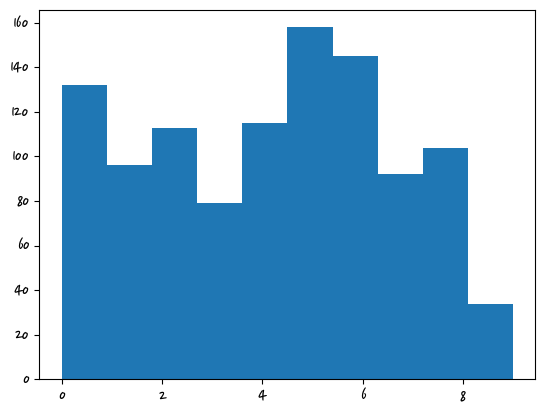

In [66]:
# 카테고리별 관객수 확인
plt.hist(data['box_office'])

### 디시전트리, 랜덤포레스트, 로지스틱회귀, knn, xgb

In [67]:
from xgboost import XGBClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [68]:
xgb_clf = XGBClassifier(n_estimators=1500, eval_metric='logloss')

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

In [69]:
data.columns

Index(['sum_audience', 'screens', 'shows', 'year', 'dir_pre_cnt',
       'dir_pre_aud', 'dir_score', 'act_pre_aud', 'act_score', 'nv_code',
       'ratings_aud', 'ratings_critics', 'ratings_netizen', 'rated_12',
       'rated_15', 'rated_all', 'rated_19', 'genre_fantasy', 'genre_family',
       'genre_horror', 'genre_etc', 'genre_documentary', 'genre_drama',
       'genre_romance', 'genre_mystery', 'genre_crime', 'genre_historical',
       'genre_thriller', 'genre_animation', 'genre_action', 'genre_adventure',
       'genre_war', 'genre_comedy', 'nation_SouthAfrica', 'nation_Denmark',
       'nation_Germany', 'nation_Russia', 'nation_Mexico', 'nation_US',
       'nation_Belgium', 'nation_Sweden', 'nation_Spain', 'nation_England',
       'nation_Italy', 'nation_India', 'nation_Indonesia', 'nation_Japan',
       'nation_China', 'nation_Czech', 'nation_Canada', 'nation_France',
       'nation_Finland', 'nation_Korea', 'nation_Australia', 'nation_HongKong',
       'box_office'],
      dtyp

다 넣은 거

In [70]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'year', 'nv_code', 'box_office']

In [71]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'nv_code', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0
RandomForestClassifier 정확도 : 0.963// 정밀도: 0.966// 재현율: 0.939// F1스코어 macro 0.945// F1스코어 micro: 0.963
LogisticRegression 정확도 : 0.117// 정밀도: 0.141// 재현율: 0.124// F1스코어 macro 0.053// F1스코어 micro: 0.117
KNeighborsClassifier 정확도 : 0.939// 정밀도: 0.945// 재현율: 0.939// F1스코어 macro 0.939// F1스코어 micro: 0.939
XGBClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        16
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        26
           6       1.00      1.00      1.00        38
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        18
           9       1.00      1.00      1.00        10

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



감독지수 뺀 거

In [73]:
# 포함 컬럼
# 스크린, 상영회수, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud', 'dir_score', 'nv_code', 'box_office']

In [74]:
# 포함 컬럼
# 스크린, 상영회수, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'dir_pre_cnt', 'dir_pre_aud', 'dir_score', 'nv_code', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0
RandomForestClassifier 정확도 : 0.888// 정밀도: 0.886// 재현율: 0.832// F1스코어 macro 0.841// F1스코어 micro: 0.888
LogisticRegression 정확도 : 0.201// 정밀도: 0.116// 재현율: 0.191// F1스코어 macro 0.123// F1스코어 micro: 0.201
KNeighborsClassifier 정확도 : 0.995// 정밀도: 0.994// 재현율: 0.995// F1스코어 macro 0.994// F1스코어 micro: 0.995
XGBClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0


In [75]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        37
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        19
           8       1.00      1.00      1.00        17
           9       1.00      1.00      1.00         6

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



배우지수 뺀 거

In [76]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'year', 'act_pre_aud', 'act_score', 'nv_code', 'box_office']

In [77]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'act_pre_aud', 'act_score', 'nv_code', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 0.846// 정밀도: 0.856// 재현율: 0.846// F1스코어 macro 0.848// F1스코어 micro: 0.846
RandomForestClassifier 정확도 : 0.804// 정밀도: 0.843// 재현율: 0.78// F1스코어 macro 0.794// F1스코어 micro: 0.804
LogisticRegression 정확도 : 0.159// 정밀도: 0.043// 재현율: 0.138// F1스코어 macro 0.062// F1스코어 micro: 0.159
KNeighborsClassifier 정확도 : 0.706// 정밀도: 0.729// 재현율: 0.699// F1스코어 macro 0.708// F1스코어 micro: 0.706
XGBClassifier 정확도 : 0.86// 정밀도: 0.863// 재현율: 0.86// F1스코어 macro 0.86// F1스코어 micro: 0.86


In [78]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.94      0.83      0.88        18
           2       0.70      0.70      0.70        20
           3       0.82      0.88      0.85        16
           4       0.90      0.75      0.82        24
           5       0.81      0.89      0.85        28
           6       0.88      0.91      0.89        23
           7       0.87      0.87      0.87        23
           8       0.89      0.89      0.89        27
           9       0.92      0.92      0.92        12

    accuracy                           0.86       214
   macro avg       0.86      0.86      0.86       214
weighted avg       0.86      0.86      0.86       214



별점지수 뺀 거

In [79]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'year', 'nv_code', 'ratings_aud', 'ratings_critics', 'ratings_netizen', 'box_office']

In [80]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'nv_code', 'ratings_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0
RandomForestClassifier 정확도 : 0.958// 정밀도: 0.949// 재현율: 0.943// F1스코어 macro 0.944// F1스코어 micro: 0.958
LogisticRegression 정확도 : 0.15// 정밀도: 0.164// 재현율: 0.153// F1스코어 macro 0.099// F1스코어 micro: 0.15
KNeighborsClassifier 정확도 : 0.916// 정밀도: 0.919// 재현율: 0.925// F1스코어 macro 0.92// F1스코어 micro: 0.916
XGBClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0


In [81]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        23
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        25
           9       1.00      1.00      1.00         6

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



상영 전 알 수 있는 정보 넣기

In [82]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'ratings_aud', 'ratings_critics', 'ratings_netizen', 'box_office']

In [83]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'ratings_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0
RandomForestClassifier 정확도 : 0.888// 정밀도: 0.883// 재현율: 0.882// F1스코어 macro 0.88// F1스코어 micro: 0.888
LogisticRegression 정확도 : 0.112// 정밀도: 0.145// 재현율: 0.115// F1스코어 macro 0.047// F1스코어 micro: 0.112
KNeighborsClassifier 정확도 : 0.874// 정밀도: 0.88// 재현율: 0.867// F1스코어 macro 0.872// F1스코어 micro: 0.874
XGBClassifier 정확도 : 1.0// 정밀도: 1.0// 재현율: 1.0// F1스코어 macro 1.0// F1스코어 micro: 1.0


In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        25
           5       1.00      1.00      1.00        33
           6       1.00      1.00      1.00        29
           7       1.00      1.00      1.00        17
           8       1.00      1.00      1.00        19
           9       1.00      1.00      1.00         4

    accuracy                           1.00       214
   macro avg       1.00      1.00      1.00       214
weighted avg       1.00      1.00      1.00       214



상영 전 알 수 있는 정보 2 (관객수랑 관련된거 최대한 빼기)

In [109]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_score, 
# 배우지수 act_score, 
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'ratings_aud', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office']

In [86]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_score, 
# 배우지수 act_score, 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'ratings_aud', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 0.724// 정밀도: 0.723// 재현율: 0.699// F1스코어 macro 0.705// F1스코어 micro: 0.724
RandomForestClassifier 정확도 : 0.607// 정밀도: 0.586// 재현율: 0.565// F1스코어 macro 0.56// F1스코어 micro: 0.607
LogisticRegression 정확도 : 0.336// 정밀도: 0.308// 재현율: 0.301// F1스코어 macro 0.289// F1스코어 micro: 0.336
KNeighborsClassifier 정확도 : 0.425// 정밀도: 0.406// 재현율: 0.38// F1스코어 macro 0.378// F1스코어 micro: 0.425
XGBClassifier 정확도 : 0.743// 정밀도: 0.738// 재현율: 0.713// F1스코어 macro 0.719// F1스코어 micro: 0.743


In [87]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        24
           1       0.84      0.73      0.78        22
           2       0.78      0.69      0.73        26
           3       0.64      0.82      0.72        17
           4       0.56      0.60      0.58        15
           5       0.71      0.81      0.76        37
           6       0.86      0.73      0.79        33
           7       0.75      0.60      0.67        15
           8       0.64      0.74      0.68        19
           9       0.75      0.50      0.60         6

    accuracy                           0.74       214
   macro avg       0.74      0.71      0.72       214
weighted avg       0.75      0.74      0.74       214



상영 전 알 수 있는 정보 3 (관객수랑 관련된거 완전 빼기)

In [115]:
# 포함 컬럼
# 감독지수 dir_pre_cnt,
# 상영등급, 장르, 국가

# 뺀 거
# ['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'dir_score', 'ratings_aud', 'act_score', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office']

In [116]:
# 포함 컬럼
# 감독지수 dir_pre_cnt,
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'dir_score', 'ratings_aud', 'act_score', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)

models = [dt_clf, rf_clf, lr_clf, knn_clf, xgb_clf]
for model in models:
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred, average='macro')
    recall = recall_score(y_test,pred, average='macro')
    f1_macro = f1_score(y_test, pred, average='macro')
    f1_micro = f1_score(y_test, pred, average='micro')
    
    model_name = model.__class__.__name__
    print(f'{model_name} 정확도 : {np.round(accuracy,3)}// 정밀도: {np.round(precision,3)}// 재현율: {np.round(recall,3)}// F1스코어 macro {np.round(f1_macro,3)}// F1스코어 micro: {np.round(f1_micro,3)}')

DecisionTreeClassifier 정확도 : 0.192// 정밀도: 0.184// 재현율: 0.159// F1스코어 macro 0.157// F1스코어 micro: 0.192
RandomForestClassifier 정확도 : 0.178// 정밀도: 0.203// 재현율: 0.157// F1스코어 macro 0.161// F1스코어 micro: 0.178
LogisticRegression 정확도 : 0.178// 정밀도: 0.11// 재현율: 0.142// F1스코어 macro 0.122// F1스코어 micro: 0.178
KNeighborsClassifier 정확도 : 0.168// 정밀도: 0.198// 재현율: 0.163// F1스코어 macro 0.16// F1스코어 micro: 0.168
XGBClassifier 정확도 : 0.215// 정밀도: 0.241// 재현율: 0.181// F1스코어 macro 0.189// F1스코어 micro: 0.215


In [117]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.41      0.37      0.39        30
           1       0.50      0.19      0.28        26
           2       0.14      0.12      0.13        16
           3       0.00      0.00      0.00        13
           4       0.13      0.10      0.11        20
           5       0.27      0.35      0.30        37
           6       0.09      0.16      0.11        25
           7       0.18      0.12      0.15        16
           8       0.19      0.26      0.22        23
           9       0.50      0.12      0.20         8

    accuracy                           0.21       214
   macro avg       0.24      0.18      0.19       214
weighted avg       0.25      0.21      0.22       214



### XGB, 피처중요도

In [88]:
import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from xgboost import plot_importance

In [110]:
# 포함 컬럼
# 감독지수 dir_pre_cnt, dir_score, 
# 배우지수 act_score, 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'ratings_aud', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [111]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [112]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [113]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-3.37803	eval-logloss:-3.59163
[1]	train-logloss:-65.49113	eval-logloss:-72.87479
[2]	train-logloss:-104.90243	eval-logloss:-114.18547
[3]	train-logloss:-108.63627	eval-logloss:-117.12828
[4]	train-logloss:-114.02284	eval-logloss:-119.59682
[5]	train-logloss:-114.08606	eval-logloss:-120.01681
[6]	train-logloss:-114.18153	eval-logloss:-120.10300
[7]	train-logloss:-114.31792	eval-logloss:-120.22639
[8]	train-logloss:-116.77911	eval-logloss:-122.47938
[9]	train-logloss:-116.78680	eval-logloss:-122.51182
[10]	train-logloss:-116.79060	eval-logloss:-122.53423
[11]	train-logloss:-116.79413	eval-logloss:-123.26402
[12]	train-logloss:-116.80615	eval-logloss:-123.23056
[13]	train-logloss:-116.81290	eval-logloss:-123.21294
[14]	train-logloss:-116.97964	eval-logloss:-122.48256
[15]	train-logloss:-116.97919	eval-logloss:-122.48267
[16]	train-logloss:-116.98135	eval-logloss:-122.48461
[17]	train-logloss:-116.98328	eval-logloss:-122.48684
[18]	train-logloss:-116.98261	eval-logloss:-

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

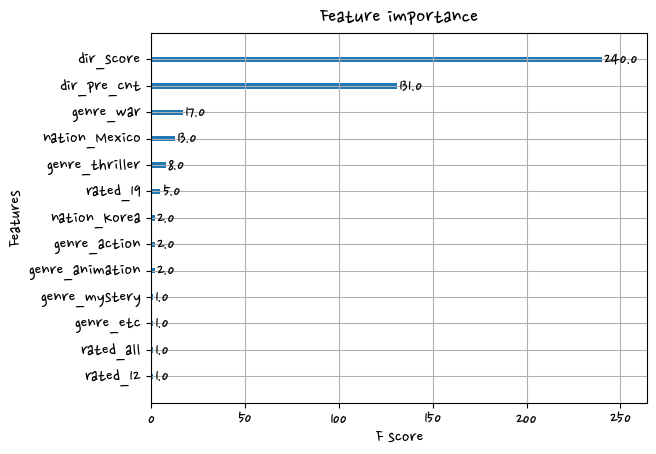

In [114]:
plot_importance(xgb_model)

In [118]:
# 포함 컬럼
# 감독지수 dir_pre_cnt,
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'screens', 'shows', 'year', 'nv_code', 'dir_pre_aud', 'dir_score', 'ratings_aud', 'act_score', 'act_pre_aud', 'ratings_critics', 'ratings_netizen', 'box_office'])

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [119]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [120]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [121]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-2.38067	eval-logloss:-2.15613
[1]	train-logloss:-12.88028	eval-logloss:-8.06350
[2]	train-logloss:-81.86505	eval-logloss:-76.13624
[3]	train-logloss:-112.69106	eval-logloss:-104.94892
[4]	train-logloss:-112.96858	eval-logloss:-106.58168
[5]	train-logloss:-116.72674	eval-logloss:-112.68343
[6]	train-logloss:-116.73483	eval-logloss:-113.47914
[7]	train-logloss:-116.99176	eval-logloss:-113.09441
[8]	train-logloss:-116.90415	eval-logloss:-113.09441
[9]	train-logloss:-116.90415	eval-logloss:-113.09441
[10]	train-logloss:-116.94253	eval-logloss:-113.09441
[11]	train-logloss:-116.94633	eval-logloss:-113.09441
[12]	train-logloss:-116.94407	eval-logloss:-113.09441
[13]	train-logloss:-116.94669	eval-logloss:-113.09441
[14]	train-logloss:-116.94608	eval-logloss:-113.09441
[15]	train-logloss:-116.94729	eval-logloss:-113.09441
[16]	train-logloss:-116.94714	eval-logloss:-113.09441
[17]	train-logloss:-116.94779	eval-logloss:-113.09441
[18]	train-logloss:-116.90415	eval-logloss:-113

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

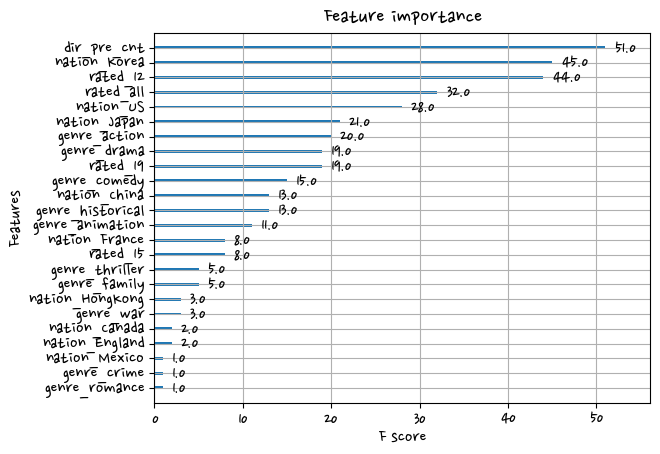

In [122]:
plot_importance(xgb_model)

In [123]:
# 포함 컬럼
# 스크린, 상영회수, 
# 감독지수 dir_pre_cnt, dir_pre_aud, dir_score, 
# 배우지수 act_pre_aud, act_score, 
# 별점 ratings_aud, ratings_critics, ratings_netizen 
# 상영등급, 장르, 국가

y = data['box_office']
X = data.drop(columns=['sum_audience', 'year', 'nv_code', 'box_office'])
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1)


In [124]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb.DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [125]:
params = {
    'max_depth': 3,
    'eta': 0.05,
    # 'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}
num_rounds = 1500
eval_list = [(dtr, 'train'), (dval, 'eval')]

In [126]:
xgb_model = xgb.train(params, dtr, num_rounds, evals=eval_list, early_stopping_rounds=50)

[0]	train-logloss:-3.86653	eval-logloss:-3.71796
[1]	train-logloss:-78.16198	eval-logloss:-75.05949
[2]	train-logloss:-109.18011	eval-logloss:-106.53051
[3]	train-logloss:-109.45081	eval-logloss:-106.86942
[4]	train-logloss:-114.69785	eval-logloss:-113.61082
[5]	train-logloss:-114.76648	eval-logloss:-113.68909
[6]	train-logloss:-114.86440	eval-logloss:-113.80177
[7]	train-logloss:-115.60395	eval-logloss:-114.66492
[8]	train-logloss:-118.59372	eval-logloss:-118.15972
[9]	train-logloss:-118.59881	eval-logloss:-118.16419
[10]	train-logloss:-118.60354	eval-logloss:-118.16836
[11]	train-logloss:-118.60794	eval-logloss:-118.17224
[12]	train-logloss:-118.61206	eval-logloss:-118.17586
[13]	train-logloss:-118.61585	eval-logloss:-118.17924
[14]	train-logloss:-118.61948	eval-logloss:-118.18240
[15]	train-logloss:-118.62278	eval-logloss:-118.18536
[16]	train-logloss:-118.62592	eval-logloss:-118.18813
[17]	train-logloss:-118.62890	eval-logloss:-118.19073
[18]	train-logloss:-118.63168	eval-logloss:-

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

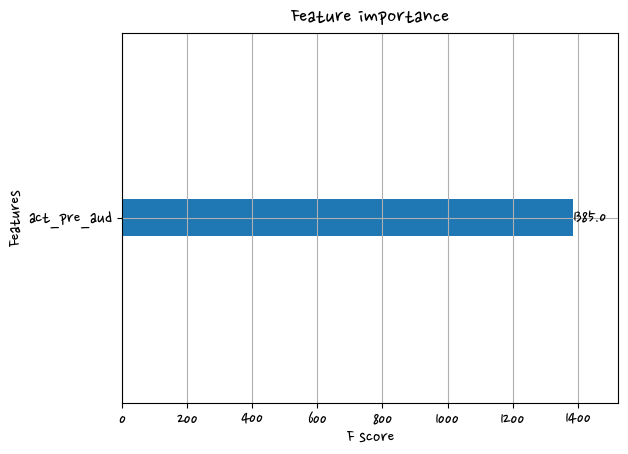

In [127]:
plot_importance(xgb_model)